## Blinkit Data Analysis and Sales Insights

### Importing Required Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [17]:
df = pd.read_csv("Blankit Analysis.csv")

### Data Overview

In [18]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [19]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
df.shape

(8523, 12)

In [22]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [23]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### Data Cleaning

In [24]:
df.isna().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [25]:
df.duplicated().sum()

0

In [26]:
df.drop(['Item Weight', 'Item Visibility'], axis=1, inplace=True)

In [27]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,55.1614,5.0


In [28]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [29]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [30]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### Feature Engineering

In [32]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Sales',
       'Rating'],
      dtype='object')

In [33]:
df['Outlet Age'] = 2025 - df['Outlet Establishment Year']

In [34]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Sales,Rating,Outlet Age
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,145.4786,5.0,13
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,115.3492,5.0,3
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,165.0210,5.0,9
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,126.5046,5.0,11
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,55.1614,5.0,10


### KPI's Requirements

In [35]:
total_sales = df['Sales'].sum()
avg_sales = round(df['Sales'].mean())
no_of_itens_sold = df['Sales'].count()
avg_ratings = df['Rating'].mean()


print(f"Total Sales Amount: ${total_sales:,.0f}")
print(f"Average Sales Amount: ${avg_sales:,.0f}")
print(f"No of items sold: {no_of_itens_sold}")
print(f"Average Rating: {avg_ratings:,.1f}")

Total Sales Amount: $1,201,681
Average Sales Amount: $141
No of items sold: 8523
Average Rating: 4.0


### Visualizations

### Total Sales by Fat Content

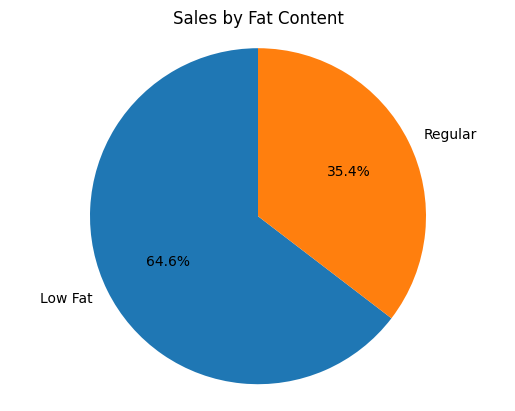

In [37]:
sales_by_fat = df.groupby("Item Fat Content")['Sales'].sum()

plt.pie(sales_by_fat, 
        labels = sales_by_fat.index, 
        autopct = '%1.1f%%', 
        startangle = 90)

plt.title("Sales by Fat Content")
plt.axis('equal')
plt.show()

### Total Sales by Item Type

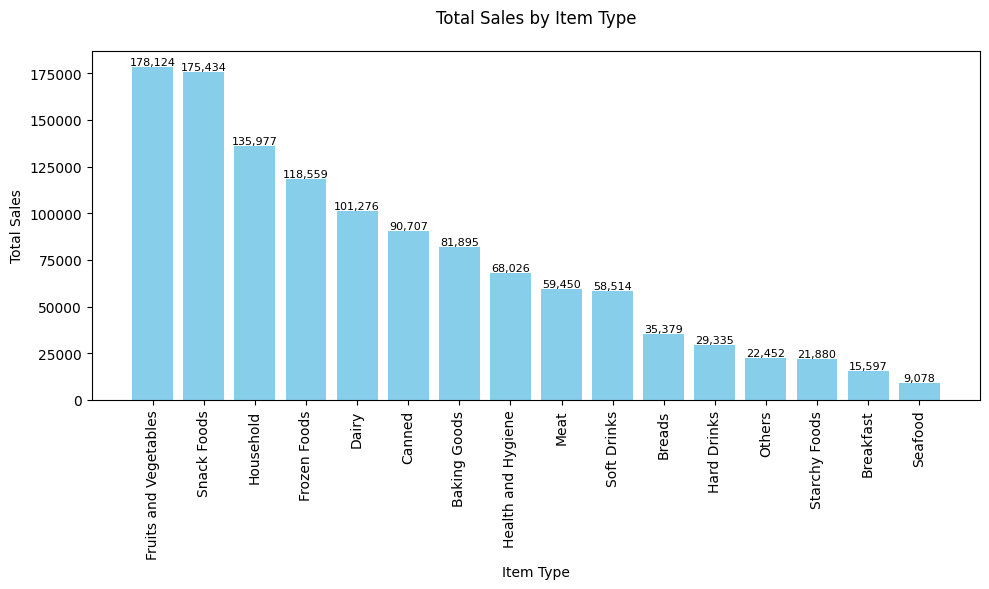

In [38]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values, color='skyblue')

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type', pad=20)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

### Sales by Outlet Size

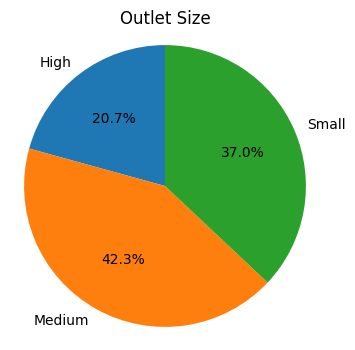

In [39]:
sales_by_size = df.groupby("Outlet Size")['Sales'].sum()
plt.figure(figsize=(4,4))

plt.pie(sales_by_size, 
        labels = sales_by_size.index, 
        autopct = '%1.1f%%', 
        startangle = 90)

plt.title("Outlet Size")
plt.axis('equal')
plt.show()

In [40]:
df.to_csv('cleaned_blinkit_data.csv', index=False)